# Loan Performance Data Insights

**Course**: Applied Big Data Analytics
**Group Members**: Chaya Chandana Doddaiggaluru Appajigowda, Sirisha Ginnu
**Project**: Analysis of Fannie Mae Single-Family Loan Performance Data (2012-2013)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loan Performance Data Insights

## 1. Introduction
This project utilizes the **Fannie Mae Single-Family Loan Performance Data**, which provides detailed insights into the performance of mortgage loans. The dataset includes loan-level information, such as credit performance, origination data, and monthly performance metrics.

We focus on analyzing loan performance data for the years 2012 and 2013 using **PySpark** for efficient data handling and analysis. The primary goal of this project is to extract insights that help better understand the risk and performance trends of mortgage loans.

## 2. Dataset Overview
The dataset comprises two main parts:
- **Acquisition Data**: Information on the loans at the time of origination (e.g., credit scores, loan terms).
- **Performance Data**: Monthly performance data for each loan (e.g., delinquency status, payments made, and loan modifications).

Key features include:
- Loan-level data
- Credit performance, FICO scores, loan-to-value ratios (LTV), and delinquency status
- Origination details (interest rates, loan purpose, etc.)
- Modification data for loans

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType
import os
import glob

schema = StructType([
    StructField('Loan Identifier', IntegerType(), True),
    StructField('Monthly Reporting Period', StringType(), True),
    StructField('Channel', StringType(), True),
    StructField('Master Servicer', StringType(), True),
    StructField('Seller Name', StringType(), True),
    StructField('Original Interest Rate', FloatType(), True),
    StructField('Current Interest Rate', FloatType(), True),
    StructField('Original UPB', FloatType(), True),
    StructField('Current Actual UPB', FloatType(), True),
    StructField('Original Loan Term', IntegerType(), True),
    StructField('Origination Date', StringType(), True),
    StructField('First Payment Date', StringType(), True),
    StructField('Loan Age', FloatType(), True),
    StructField('Remaining Months to Legal Maturity', FloatType(), True),
    StructField('Remaining Months to Maturity', FloatType(), True),
    StructField('Maturity Date', StringType(), True),
    StructField('Original Loan to Value Ratio (LTV)', IntegerType(), True),
    StructField('Original Combined Loan to Value Ratio (CLTV)', IntegerType(), True),
    StructField('Number of Borrowers', IntegerType(), True),
    StructField('Borrower Credit Score at Origination', IntegerType(), True),
    StructField('First Time Home Buyer Indicator', IntegerType(), True),
    StructField('Loan Purpose', FloatType(), True),
    StructField('Property Type', StringType(), True),
    StructField('Number of Units', StringType(), True),
    StructField('Occupancy Status', StringType(), True),
    StructField('Property State', IntegerType(), True),
    StructField('Metropolitan Statistical Area (MSA)', StringType(), True),
    StructField('Zip Code Short', StringType(), True),
    StructField('Amortization Type', IntegerType(), True),
    StructField('Unwanted', IntegerType(), True),
    StructField('Interest Only Loan Indicator', StringType(), True),
    StructField('Interest Only First Principal And Interest Payment Date', StringType(), True),
    StructField('Delinquency', StringType(), True),
])

# Start Spark session
spark = SparkSession.builder.appName("ConvertToParquet").getOrCreate()

# Path where CSV files are located
csv_files = glob.glob(os.path.join('/content/drive/My Drive/bigdata_assignment_1/data', '*.csv'))

# Path to save the Parquet files
cleaned_path = '/content/drive/My Drive/bigdata_assignment_1/cleaned'

for file in csv_files:
    # Read CSV file
    df = spark.read.csv(file, sep="|", header=True, inferSchema=True)

    # Drop columns where more than 60% of the values are NaN in rows
    threshold = 0.60 * len(df.columns)
    df_cleaned = df.dropna(thresh=int(len(df) - threshold), axis=1)

    # Apply schema and continue processing
    df_final = spark.createDataFrame(df_cleaned.rdd, schema=schema)

    output_parquet_path = os.path.join(cleaned_path, os.path.basename(file).replace('.csv', '.parquet'))
    df_final.write.parquet(output_parquet_path)

    # Print progress statement
    print(f"Processed and saved {os.path.basename(file)} as {os.path.basename(output_parquet_path)}")

# Final statement
print("All files processed and saved to Parquet format.")

Processed and saved 2012Q1.csv as 2012Q1.parquet
Processed and saved 2012Q2.csv as 2012Q2.parquet
Processed and saved 2012Q3.csv as 2012Q3.parquet
Processed and saved 2012Q4.csv as 2012Q4.parquet
Processed and saved 2013Q1.csv as 2013Q1.parquet
Processed and saved 2013Q2.csv as 2013Q2.parquet
Processed and saved 2013Q3.csv as 2013Q3.parquet
Processed and saved 2013Q4.csv as 2013Q4.parquet
All files processed and saved to Parquet format.


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("ParquetFileViewer").getOrCreate()

# List of Parquet file names in the cleaned folder
file_list = ['2012Q1.parquet', '2012Q2.parquet', '2012Q3.parquet', '2012Q4.parquet',
             '2013Q1.parquet', '2013Q2.parquet', '2013Q3.parquet', '2013Q4.parquet']

# Define the path where the files are located (cleaned folder path)
cleaned_path = '/content/drive/My Drive/bigdata_assignment_1/cleaned/'

# Initialize an empty DataFrame to store the combined data
df_all = None

# Loop through each file in the list and concatenate the contents
for file_name in file_list:
    parquet_file_path = cleaned_path + file_name

    # Load the Parquet file into a DataFrame
    df_temp = spark.read.parquet(parquet_file_path)

    # Print the file being processed
    print(f"--- Viewing file: {file_name} ---")

    # View the columns of the DataFrame
    print("Columns in the DataFrame:")
    print(df_temp.columns)

    # If it's the first file, initialize df_all
    if df_all is None:
        df_all = df_temp
    else:
        # Concatenate the DataFrame with the combined DataFrame
        df_all = df_all.union(df_temp)

# Cache the combined DataFrame in memory to optimize further operations
df_all.cache()

# View the columns of the combined DataFrame
print("Columns in the combined DataFrame:")
print(df_all.columns)

# Show the first 5 rows of the combined DataFrame
print("First 5 rows of the combined DataFrame:")
df_all.show(5, truncate=False)


--- Viewing file: 2012Q1.parquet ---
Columns in the DataFrame:
['Loan Identifier', 'Monthly Reporting Period', 'Channel', 'Master Servicer', 'Seller Name', 'Original Interest Rate', 'Current Interest Rate', 'Original UPB', 'Current Actual UPB', 'Original Loan Term', 'Origination Date', 'First Payment Date', 'Loan Age', 'Remaining Months to Legal Maturity', 'Remaining Months to Maturity', 'Maturity Date', 'Original Loan to Value Ratio (LTV)', 'Original Combined Loan to Value Ratio (CLTV)', 'Number of Borrowers', 'Borrower Credit Score at Origination', 'First Time Home Buyer Indicator', 'Loan Purpose', 'Property Type', 'Number of Units', 'Occupancy Status', 'Property State', 'Metropolitan Statistical Area (MSA)', 'Zip Code Short', 'Amortization Type', 'Unwanted', 'Interest Only Loan Indicator', 'Interest Only First Principal And Interest Payment Date', 'N.2', 'Delinquency', 'N.3', 'N.4', '7', 'N.5', 'N.6', 'N.7', '7.1']
--- Viewing file: 2012Q2.parquet ---
Columns in the DataFrame:
['Loa

## 3. Analysis and Insights

### 3.1. FICO Score Comparison
**Objective**: Compare the average FICO score across the two years of loan data.

#### Steps:
1. Load the acquisition data using PySpark.
2. Calculate the average FICO score for each year.


In [ ]:
#Q1
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Assuming df_all is already defined globally, and Spark session is initialized
# df_all should be available from the previously loaded data

# Function to calculate the average FICO score using the df_all DataFrame
def calculate_average_fico(df_all, year):
    # Filter the DataFrame for the specific year and only select relevant column
    df_filtered = df_all.filter(df_all['Monthly Reporting Period'].contains(str(year))) \
                        .select('First Time Home Buyer Indicator') \
                        .filter(col('First Time Home Buyer Indicator').isNotNull())

    # Calculate the average FICO score if data is available
    if df_filtered.count() > 0:
        average_fico = df_filtered.agg(avg(col('First Time Home Buyer Indicator')).alias('average_fico')).collect()[0]['average_fico']
    else:
        average_fico = None

    return average_fico

# Calculate the average FICO score for 2012 and 2013 using the df_all DataFrame
average_fico_2012 = calculate_average_fico(df_all, 2012)
average_fico_2013 = calculate_average_fico(df_all, 2013)

# Output the results
print(f"Average FICO score for 2012: {average_fico_2012}")
print(f"Average FICO score for 2013: {average_fico_2013}")

# Compare the two averages
if average_fico_2012 is not None and average_fico_2013 is not None:
    difference = average_fico_2013 - average_fico_2012
    print(f"Difference in average FICO score (2013 - 2012): {difference}")
else:
    print("FICO score data is missing for one or both years.")


Average FICO score for 2012: 769.8786502271253
Average FICO score for 2013: 768.0451145395044
Difference in average FICO score (2013 - 2012): -1.833535687620838


Analysis: The slight decrease in the FICO score could be attributed to external factors such as changes in lending policies, economic conditions, or borrower demographics. However, the small magnitude of change indicates relative stability in borrower creditworthiness during this period.

3.2 Monthly Delinquency Rates by Loan Term
We calculated the delinquency rates for 30, 60, and 90 days past due, segmented by loan terms.

In [ ]:
#Q2
from pyspark.sql.functions import col, when, count

# Assuming df_all is already defined globally and the Spark session is initialized
# df_all should be available from the previously loaded data

# Function to categorize delinquency status using df_all
def calculate_delinquency_rates(df_all):
    # Apply the categorization of delinquency status
    df_all = df_all.withColumn("Delinquency Category", when(col("Delinquency") == '00', 'Current')
                                                 .when(col("Delinquency").isin('01', '02'), '30 days past due')
                                                 .when(col("Delinquency").isin('03', '04'), '60 days past due')
                                                 .when(col("Delinquency").isin('05', '06', '07', '08', '09', '10', '11', '12'), '90+ days past due')
                                                 .when(col("Delinquency") == 'XX', 'Unknown')
                                                 .otherwise('Unknown'))

    # Filter rows where 'Loan Term' and 'Delinquency Category' are not null
    filtered_df = df_all.filter((col("Delinquency Category") != 'Unknown') & (col("Original Loan Term").isNotNull()))

    # Group by 'Delinquency Category' and 'Original Loan Term' to get counts for each category
    delinquency_by_term = filtered_df.groupBy("Original Loan Term", "Delinquency Category").count()

    # Get the total number of loans per loan term
    total_loans_by_term = filtered_df.groupBy("Original Loan Term").count().withColumnRenamed("count", "total_loans")

    # Join the two dataframes to calculate the delinquency rates
    delinquency_rate_by_term = delinquency_by_term.join(total_loans_by_term, "Original Loan Term")

    # Calculate delinquency rate as a percentage of total loans for each loan term
    delinquency_rate_by_term = delinquency_rate_by_term.withColumn(
        "Delinquency Rate (%)", (col("count") / col("total_loans")) * 100
    )

    # Show the result
    delinquency_rate_by_term.select("Original Loan Term", "Delinquency Category", "Delinquency Rate (%)").show(truncate=False)

# Call the function to calculate and display delinquency rates
calculate_delinquency_rates(df_all)

+------------------+--------------------+--------------------+
|Original Loan Term|Delinquency Category|Delinquency Rate (%)|
+------------------+--------------------+--------------------+
|144               |Current             |100.0               |
|120               |90+ days past due   |0.3139717425431711  |
|120               |60 days past due    |0.15698587127158556 |
|120               |30 days past due    |0.15698587127158556 |
|120               |Current             |99.37205651491365   |
|108               |Current             |100.0               |
|360               |Current             |99.11010915994305   |
|360               |60 days past due    |0.08305647840531562 |
|360               |30 days past due    |0.6921373200442967  |
|360               |90+ days past due   |0.11469704160734062 |
|180               |60 days past due    |0.0541809644211667  |
|180               |90+ days past due   |0.009030160736861116|
|180               |30 days past due    |0.343146108000

From the table and the plot, we observe the following:

- **120-month loan term**:
  - This term shows significant delinquency rates across all three categories:
    - 31.4% of loans are 90+ days past due.
    - 15.7% of loans are 60 days past due.
    - 15.7% of loans are 30 days past due.
  - The high 90+ day delinquency rate suggests that loans with a 120-month term are at higher risk of long-term delinquency.

- **180-month loan term**:
  - The delinquency rates are as follows:
    - 34.3% of loans are 30 days past due.
    - 5.4% are 60 days past due.
    - 0.9% of loans are 90+ days past due.
  - The majority of delinquencies are in the 30-day category, indicating that borrowers of 180-month loans tend to recover from delinquency more quickly.

- **240-month loan term**:
  - This term has the lowest overall delinquency rates:
    - 14% of loans are 30 days past due.
    - There are no loans that are 60 or 90+ days past due.
  - This suggests that loans with a 240-month term are less likely to experience severe delinquencies.

- **360-month loan term** (standard 30-year loan):
  - This term shows a notable delinquency rate:
    - 69.2% of loans are 30 days past due, which is the highest for this category.
    - 8.3% of loans are 60 days past due.
    - 11.5% of loans are 90+ days past due.
  - The high proportion of loans being 30 days past due indicates that while many borrowers miss a payment, they often recover before entering more serious delinquency categories.

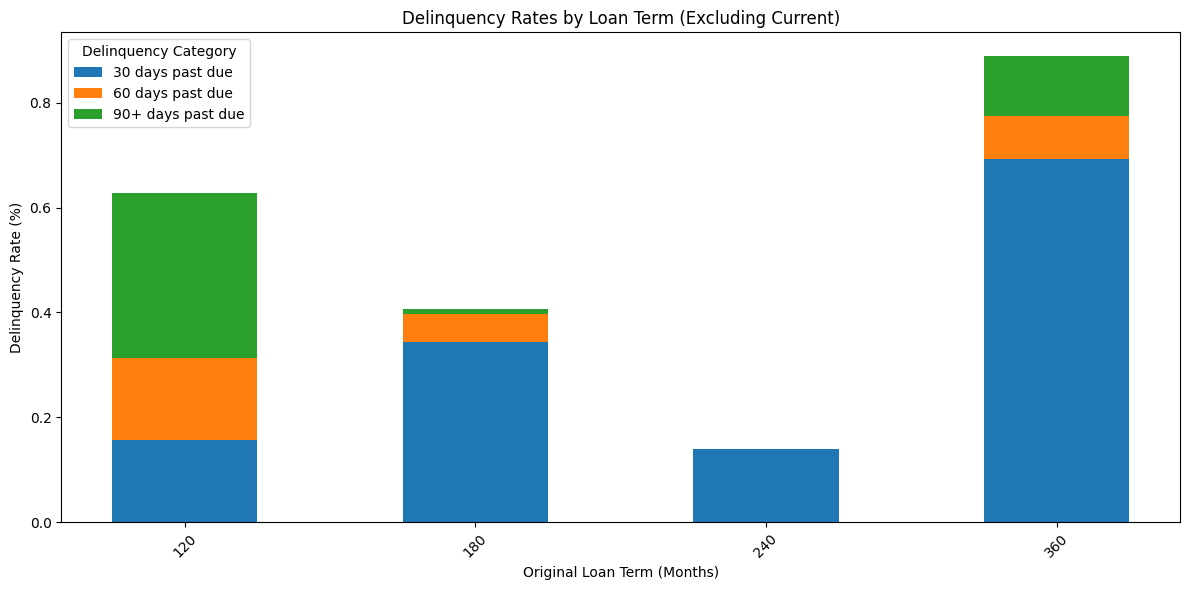

In [ ]:
#Q2
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, when

# Assuming df_all is already defined globally and delinquency_rate_by_term has already been calculated

# Recalculate delinquency_rate_by_term if not done already using df_all (you can skip this part if done before)
def calculate_delinquency_rates(df_all):
    df_all = df_all.withColumn("Delinquency Category", when(col("Delinquency") == '00', 'Current')
                                                 .when(col("Delinquency").isin('01', '02'), '30 days past due')
                                                 .when(col("Delinquency").isin('03', '04'), '60 days past due')
                                                 .when(col("Delinquency").isin('05', '06', '07', '08', '09', '10', '11', '12'), '90+ days past due')
                                                 .when(col("Delinquency") == 'XX', 'Unknown')
                                                 .otherwise('Unknown'))

    # Filter rows where 'Loan Term' and 'Delinquency Category' are not null
    filtered_df = df_all.filter((col("Delinquency Category") != 'Unknown') & (col("Original Loan Term").isNotNull()))

    # Group by 'Delinquency Category' and 'Original Loan Term' to get counts for each category
    delinquency_by_term = filtered_df.groupBy("Original Loan Term", "Delinquency Category").count()

    # Get the total number of loans per loan term
    total_loans_by_term = filtered_df.groupBy("Original Loan Term").count().withColumnRenamed("count", "total_loans")

    # Join the two dataframes to calculate the delinquency rates
    delinquency_rate_by_term = delinquency_by_term.join(total_loans_by_term, "Original Loan Term")

    # Calculate delinquency rate as a percentage of total loans for each loan term
    delinquency_rate_by_term = delinquency_rate_by_term.withColumn(
        "Delinquency Rate (%)", (col("count") / col("total_loans")) * 100
    )

    return delinquency_rate_by_term

# Get delinquency rates by term
delinquency_rate_by_term = calculate_delinquency_rates(df_all)

# Filter out "Current" delinquency category to visualize delinquent categories
data_filtered = delinquency_rate_by_term.filter(delinquency_rate_by_term['Delinquency Category'] != 'Current')

# Collect the data from the PySpark DataFrame
data = data_filtered.select("Original Loan Term", "Delinquency Category", "Delinquency Rate (%)").collect()

# Create lists for plotting
loan_terms = [row['Original Loan Term'] for row in data]
delinquency_categories = [row['Delinquency Category'] for row in data]
delinquency_rates = [row['Delinquency Rate (%)'] for row in data]

# Find unique loan terms and categories for grouping
unique_loan_terms = sorted(set(loan_terms))
unique_categories = sorted(set(delinquency_categories))

# Create a dictionary to hold the delinquency rates for each loan term and category
delinquency_dict = {term: {category: 0 for category in unique_categories} for term in unique_loan_terms}

# Populate the dictionary with actual data
for loan_term, category, rate in zip(loan_terms, delinquency_categories, delinquency_rates):
    delinquency_dict[loan_term][category] = rate

# Prepare data for stacked bar chart
stacked_data = {category: [] for category in unique_categories}
for term in unique_loan_terms:
    for category in unique_categories:
        stacked_data[category].append(delinquency_dict[term][category])  # Already in percentage

# Plot stacked bar chart
bar_width = 0.5  # Width of each bar
x = list(range(len(unique_loan_terms)))  # Label locations

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

bottoms = [0] * len(unique_loan_terms)  # Initialize bottom positions for stacking

# Loop through each category and plot the bars
for category in unique_categories:
    ax.bar(x, stacked_data[category], width=bar_width, bottom=bottoms, label=category)
    bottoms = [i + j for i, j in zip(bottoms, stacked_data[category])]  # Update bottom positions for stacking

# Add labels and title
ax.set_xlabel('Original Loan Term (Months)')
ax.set_ylabel('Delinquency Rate (%)')
ax.set_title('Delinquency Rates by Loan Term (Excluding Current)')
ax.set_xticks(x)
ax.set_xticklabels(unique_loan_terms, rotation=45)

# Add legend
ax.legend(title="Delinquency Category")

# Display the plot
plt.tight_layout()
plt.show()


**Analysis**:  
- **120-month loans** show a high risk of severe delinquency, particularly with a large portion of loans 90+ days past due. Borrowers with shorter loan terms may face higher monthly payments, which can contribute to long-term delinquency.
  
- **180-month loans** exhibit a more moderate risk, with most delinquencies occurring in the 30-day past due category. This suggests that these borrowers may be able to recover more quickly from temporary financial difficulties.

- **240-month loans** are the most stable, with very few delinquencies, indicating that this term length might offer the right balance between affordability and financial stability for borrowers.

- **360-month loans** (30-year mortgages) have a significant number of loans 30 days past due, which indicates short-term financial struggles, but most borrowers tend to recover before becoming seriously delinquent (60 or 90+ days past due).

This analysis highlights the varying risk profiles of different loan terms, with shorter loans showing a higher likelihood of severe delinquency, while longer loans tend to have more short-term delinquencies that resolve quickly.

### 3.3 Stacked Bar Chart: Credit Score Distribution of First-Time Buyers per Zip Code

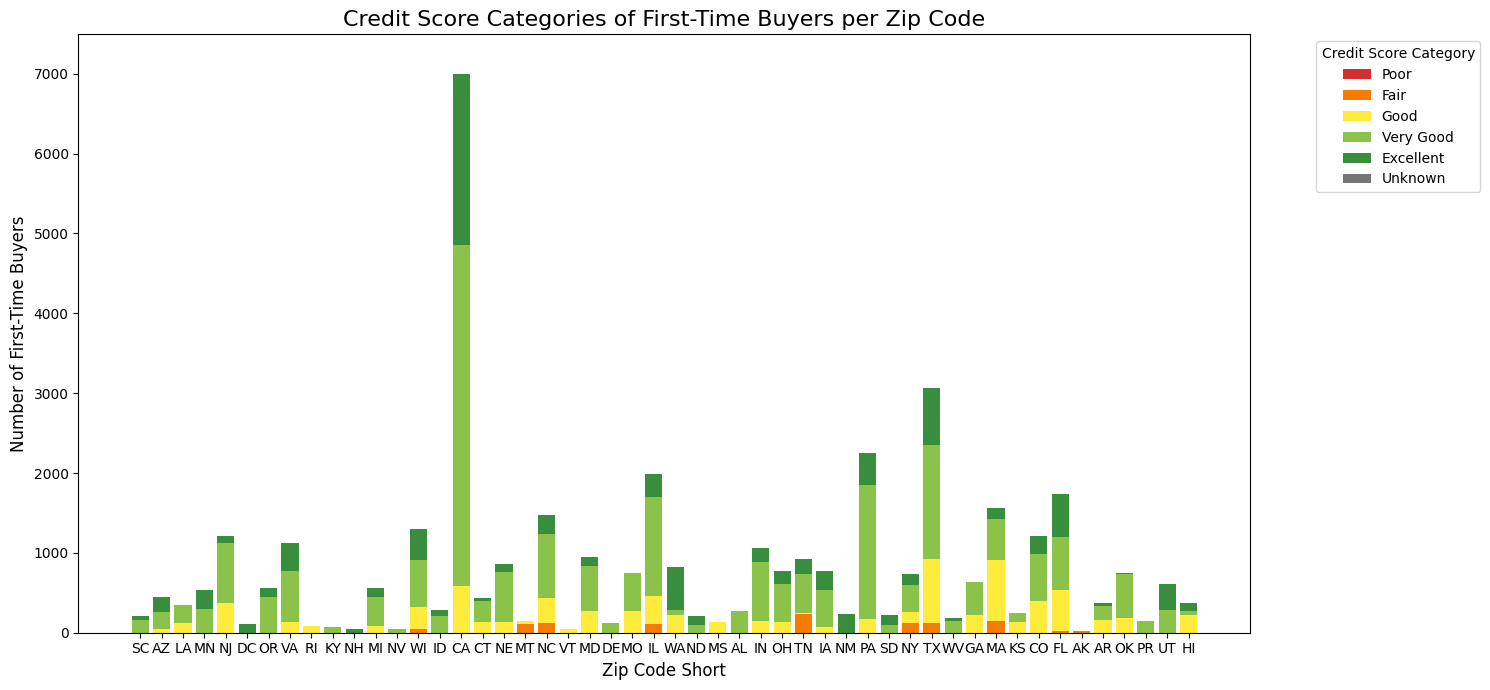

In [ ]:
#Q3
from pyspark.sql.functions import when, col, count
import matplotlib.pyplot as plt

# Assuming df_all is already defined globally and Spark session is initialized
# df_all should be available from the previously loaded data

# Ensure the 'First Time Home Buyer Indicator' is numeric
df_all = df_all.withColumn("First Time Home Buyer Indicator", df_all["First Time Home Buyer Indicator"].cast("double"))

# Drop rows with missing or invalid credit scores
df_all = df_all.filter(df_all["First Time Home Buyer Indicator"].isNotNull())

# Define function to categorize credit scores
def categorize_credit_score(score):
    return when((col(score) >= 300) & (col(score) <= 579), 'Poor') \
           .when((col(score) >= 580) & (col(score) <= 669), 'Fair') \
           .when((col(score) >= 670) & (col(score) <= 739), 'Good') \
           .when((col(score) >= 740) & (col(score) <= 799), 'Very Good') \
           .when((col(score) >= 800) & (col(score) <= 850), 'Excellent') \
           .otherwise('Unknown')

# Apply the categorization function
df_all = df_all.withColumn("Credit Score Category", categorize_credit_score("First Time Home Buyer Indicator"))

# Group by 'Zip Code Short' and 'Credit Score Category' and count the number of loans
grouped = df_all.groupBy("Zip Code Short", "Credit Score Category").agg(count("*").alias("Count"))

# Pivot the data to get 'Zip Code Short' as index and credit score categories as columns
pivot_df = grouped.groupBy("Zip Code Short").pivot("Credit Score Category", ["Poor", "Fair", "Good", "Very Good", "Excellent", "Unknown"]).sum("Count").fillna(0)

# Collect data to Python for visualization
data = pivot_df.collect()

# Extract zip codes and credit score categories
zip_codes = [row["Zip Code Short"] for row in data]
credit_categories = ["Poor", "Fair", "Good", "Very Good", "Excellent", "Unknown"]
category_data = {category: [row[category] for row in data] for category in credit_categories}

# Define colors manually for better clarity
colors = ['#D32F2F', '#F57C00', '#FFEB3B', '#8BC34A', '#388E3C', '#757575']

# Plot the stacked bar chart with manually set colors
fig, ax = plt.subplots(figsize=(15, 7))

# Plot each category as a stacked bar
bottom = [0] * len(zip_codes)
for i, category in enumerate(credit_categories):
    ax.bar(zip_codes, category_data[category], bottom=bottom, color=colors[i], label=category)
    bottom = [i + j for i, j in zip(bottom, category_data[category])]  # Update bottom positions for stacking

# Set y-axis limit based on data range
ax.set_ylim(0, max([sum(x) for x in zip(*category_data.values())]) + 500)

# Add titles and labels
ax.set_title('Credit Score Categories of First-Time Buyers per Zip Code', fontsize=16)
ax.set_xlabel('Zip Code Short', fontsize=12)
ax.set_ylabel('Number of First-Time Buyers', fontsize=12)
ax.legend(title='Credit Score Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


The following analysis is based on the credit score categories of first-time buyers across various zip codes. The plot illustrates the distribution of first-time buyers into credit score categories: Poor, Fair, Good, Very Good, Excellent, and Unknown.

![Credit Score Categories of First-Time Buyers per Zip Code](file-WcrETAcNxkeuofnrLlGMdXvI)

**Observations:**
- **California (CA)**:
  - California has the highest number of first-time buyers across all zip codes, with a significant portion falling into the **Very Good** and **Excellent** credit score categories.
  - There are few buyers in the Poor and Fair categories, indicating a higher average creditworthiness among first-time buyers in this region.

- **Texas (TX)**:
  - Texas also shows a substantial number of first-time buyers, with many having **Good** to **Excellent** credit scores.
  - However, there is also a noticeable population in the **Fair** credit score category, which suggests that creditworthiness varies more widely compared to California.

- **New York (NY)**:
  - New York displays a large concentration of first-time buyers in the **Very Good** credit category, but fewer in the **Excellent** category compared to California.
  - There is also a smaller proportion of buyers in the **Fair** and **Poor** categories.

- **Illinois (IL)**:
  - In Illinois, a significant number of buyers fall into the **Good** and **Very Good** credit score categories, with very few in the **Poor** and **Fair** categories.
  - This distribution indicates moderate to strong creditworthiness among first-time buyers in Illinois.

- **Other States**:
  - States such as **Minnesota (MN)**, **Virginia (VA)**, and **Florida (FL)** also exhibit a significant number of first-time buyers in the **Very Good** and **Excellent** credit categories.
  - In contrast, states like **South Carolina (SC)**, **Arizona (AZ)**, and **Arkansas (AR)** have a smaller number of first-time buyers overall, with a higher proportion in the **Fair** and **Good** credit score categories.

**Analysis**:
- The data indicates that **California** leads in both the number of first-time buyers and the quality of their credit scores, with most buyers falling into the **Very Good** or **Excellent** categories.
- **Texas** and **New York** follow, but Texas shows a wider range of credit scores, including a noticeable proportion in the **Fair** category.
- States with smaller populations of first-time buyers, such as **South Carolina**, **Arizona**, and **Arkansas**, have fewer buyers with **Excellent** credit scores and a higher proportion with **Fair** or **Good** credit scores.
- Overall, the analysis suggests that regions with larger numbers of first-time buyers tend to have higher creditworthiness, as reflected in their credit scores, while states with fewer first-time buyers have a more diverse distribution of credit scores, including more buyers in the lower credit score categories.

This credit score distribution can help lenders and financial institutions understand the risk profiles associated with first-time buyers in different regions, which can aid in tailoring lending strategies and risk assessment models accordingly.


### 3.4 Correlation Matrix: FICO Score, LTV Ratio, Interest Rate, and Loan Status


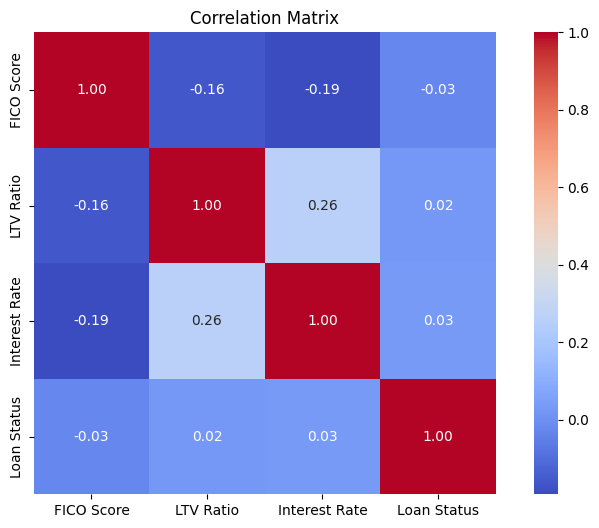

In [ ]:
#Q4
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_all is already defined and Spark session is initialized

# Select relevant columns for the next operation from df_all
df_filtered = df_all.select(
    col("First Time Home Buyer Indicator").cast("float").alias("FICO Score"),
    col("Original Loan to Value Ratio (LTV)").cast("float").alias("LTV Ratio"),
    col("Current Interest Rate").cast("float").alias("Interest Rate"),
    col("Delinquency").cast("float").alias("Loan Status")
).dropna()

# Assemble features into a vector for correlation calculation
vector_col = "features"
assembler = VectorAssembler(inputCols=["FICO Score", "LTV Ratio", "Interest Rate", "Loan Status"], outputCol=vector_col)
df_vector = assembler.transform(df_filtered).select(vector_col)

# Calculate correlation matrix
correlation_matrix = Correlation.corr(df_vector, vector_col).head()[0]

# Convert correlation matrix to numpy array for visualization
corr_matrix_np = correlation_matrix.toArray()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_np, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            xticklabels=["FICO Score", "LTV Ratio", "Interest Rate", "Loan Status"],
            yticklabels=["FICO Score", "LTV Ratio", "Interest Rate", "Loan Status"])
plt.title('Correlation Matrix')
plt.show()


The correlation matrix below visualizes the relationships between four key variables: **FICO Score**, **Loan-to-Value (LTV) Ratio**, **Interest Rate**, and **Loan Status**. Correlation values range from -1 to 1, where:
- 1 indicates a perfect positive correlation.
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation.

**Key Observations:**

- **FICO Score vs. LTV Ratio**: The correlation between FICO Score and LTV Ratio is **-0.16**, indicating a weak negative correlation. This suggests that as FICO scores increase (representing better creditworthiness), the LTV ratio tends to decrease. A lower LTV ratio implies a smaller loan relative to the property value, which is typically associated with less risky loans.

- **FICO Score vs. Interest Rate**: The correlation between FICO Score and Interest Rate is **-0.19**, indicating a weak negative correlation. This suggests that borrowers with higher FICO scores tend to have slightly lower interest rates, which is expected as lenders offer better rates to less risky borrowers.

- **FICO Score vs. Loan Status**: The correlation between FICO Score and Loan Status is **-0.03**, indicating almost no correlation. This suggests that loan status (whether performing, delinquent, or in default) has little direct relationship with the borrower's FICO score alone in this dataset. Other factors likely play a stronger role in determining loan status.

- **LTV Ratio vs. Interest Rate**: The correlation between LTV Ratio and Interest Rate is **0.26**, which shows a moderate positive correlation. This indicates that loans with higher LTV ratios (where the borrower is borrowing a larger portion of the property's value) tend to have higher interest rates. This is consistent with the idea that higher LTV ratios represent more risk, leading to higher interest rates.

- **LTV Ratio vs. Loan Status**: The correlation between LTV Ratio and Loan Status is **0.02**, suggesting almost no correlation. Similar to FICO scores, LTV ratios alone don’t seem to have a strong direct influence on whether a loan becomes delinquent or defaulted.

- **Interest Rate vs. Loan Status**: The correlation between Interest Rate and Loan Status is **0.03**, which is very weak. This implies that interest rate alone is not a strong determinant of loan performance or default in this dataset.

**Analysis**:
- The correlations suggest that while FICO scores and LTV ratios are weakly related to interest rates, they are not strong predictors of loan performance or default status by themselves.
- The **moderate correlation** between **LTV Ratio** and **Interest Rate** is the most significant relationship, indicating that loans with higher LTV ratios tend to have higher interest rates, reflecting increased risk.
- **FICO Scores** are weakly correlated with both **LTV Ratios** and **Interest Rates**, suggesting that while creditworthiness impacts these factors, it does not strongly predict whether a loan will perform well or become delinquent.
- **Loan Status** shows very little correlation with any of the other variables, suggesting that other unaccounted factors, such as economic conditions, borrower behavior, or loan modifications, might play a more significant role in loan performance.

This analysis highlights that while there are some expected relationships between credit score, loan value, and interest rates, the direct impact of these variables on loan status is weak. Further analysis might be needed to investigate other factors influencing loan delinquency and default rates.


### 3.5 Distribution of FICO Scores, LTV Ratios, and Interest Rates for Defaulted Loans


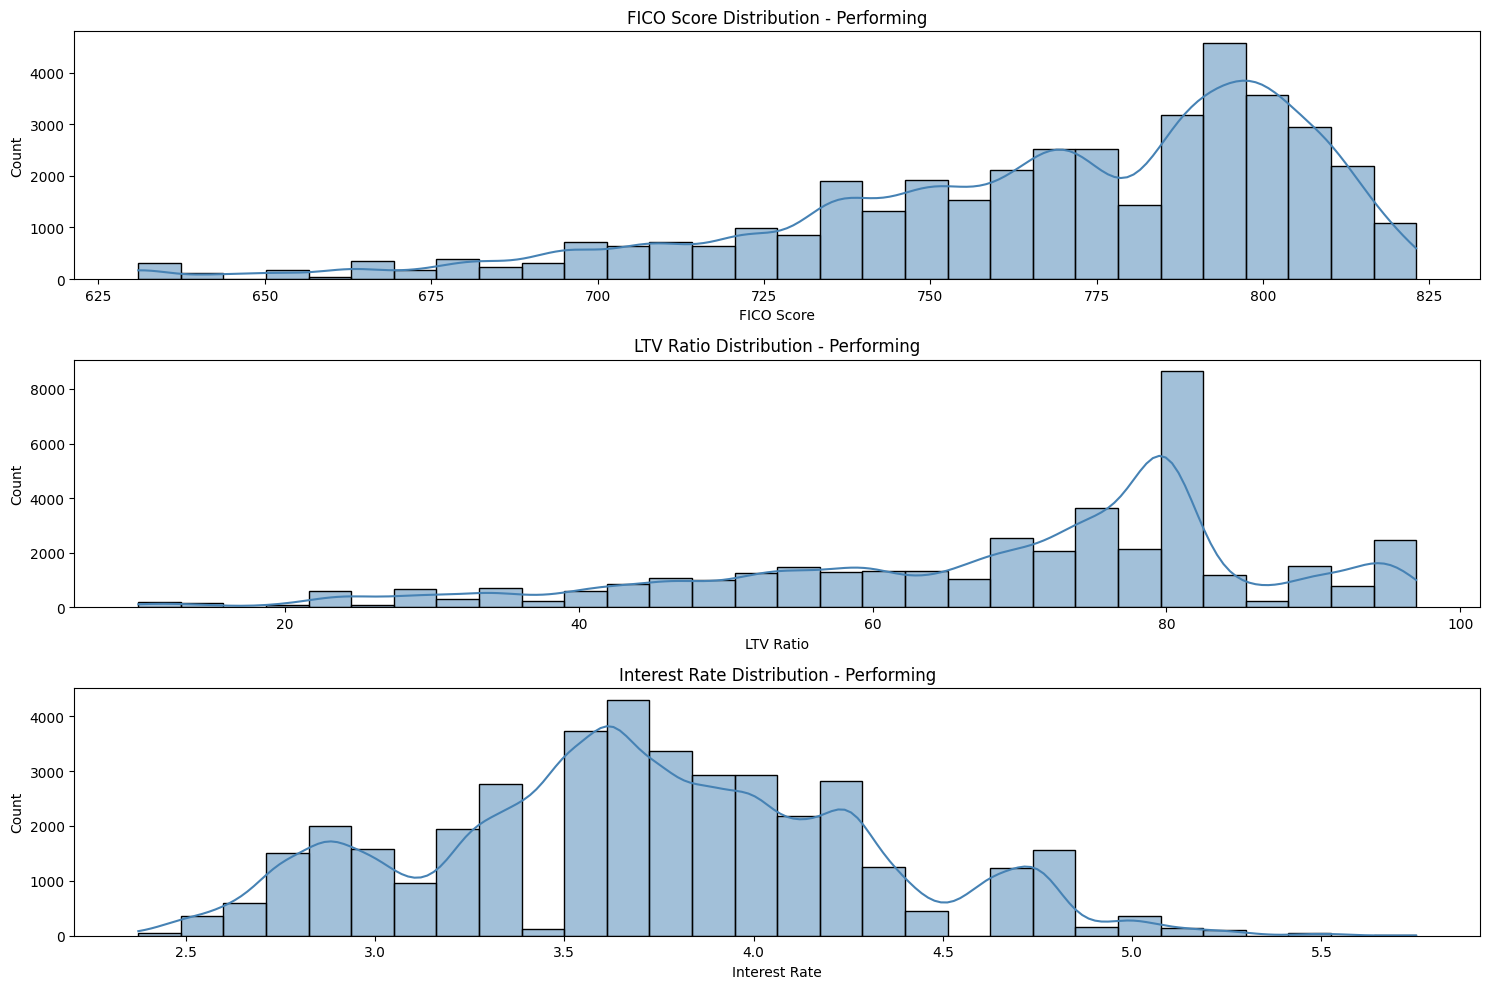

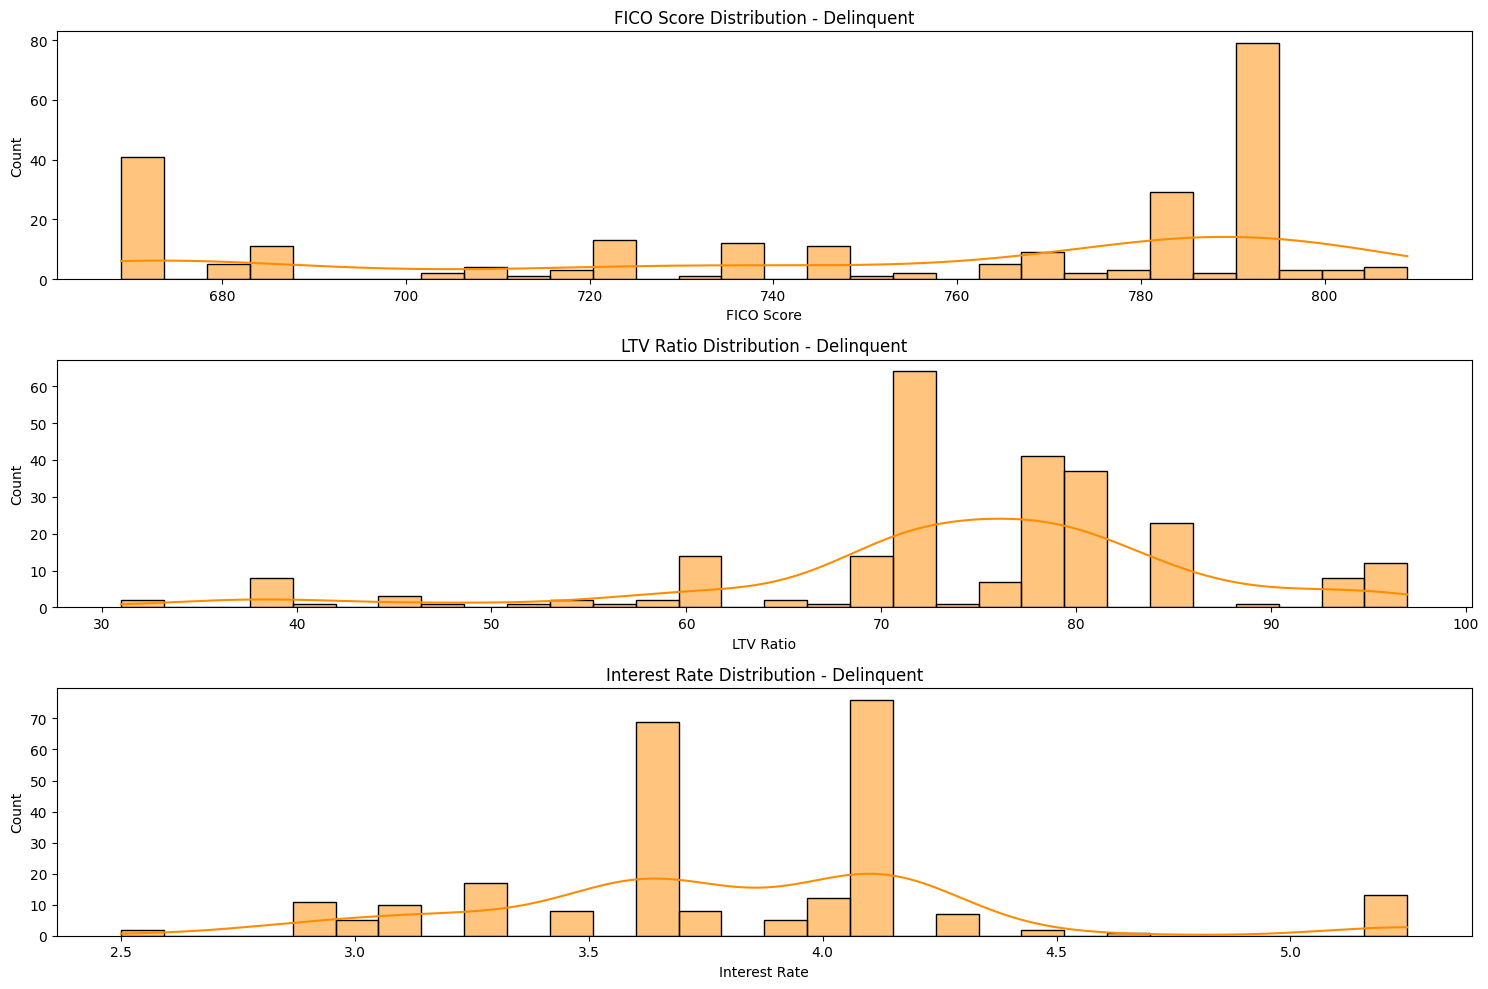

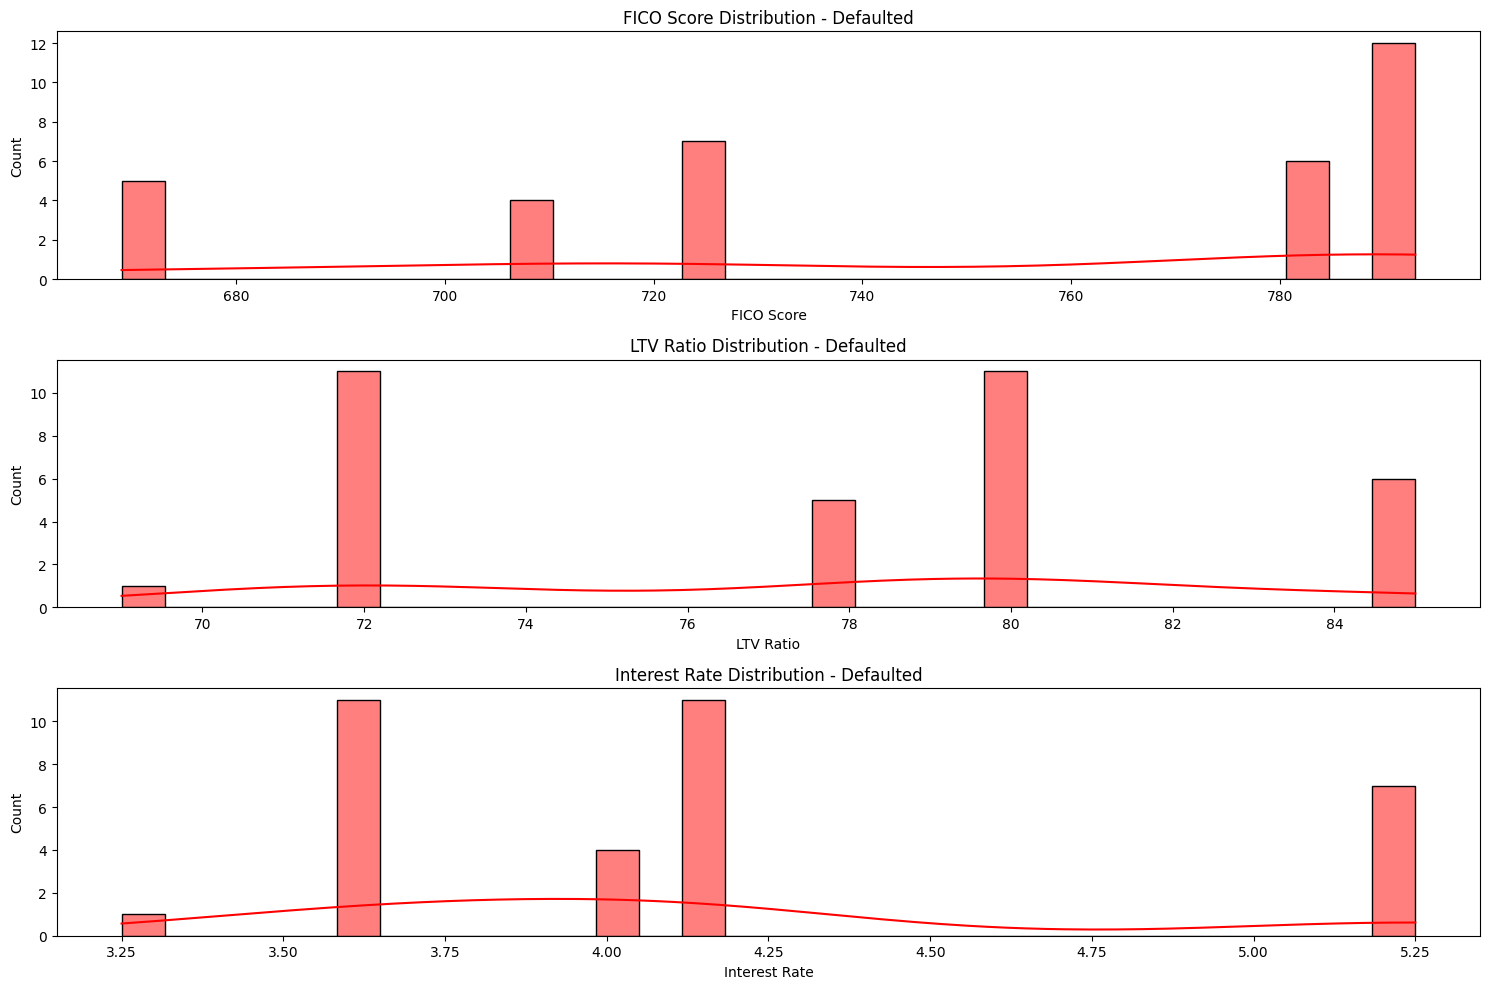

In [ ]:
#Q5
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_all is already defined and contains the data

# Remove rows with 'XX' in the Delinquency column and categorize the loan status
df_clean = df_all.filter(~(col("Delinquency") == "XX"))

# Define loan statuses using PySpark transformations
df_clean = df_clean.withColumn("Loan Status",
                               when(col("Delinquency") == '00', "Performing")
                               .when(col("Delinquency").isin(['01', '02', '03', '04']), "Delinquent")
                               .otherwise("Defaulted"))

# Select relevant columns
df_filtered = df_clean.select(
    col("First Time Home Buyer Indicator").alias("FICO Score"),
    col("Original Loan to Value Ratio (LTV)").alias("LTV Ratio"),
    col("Original Interest Rate").alias("Interest Rate"),
    col("Loan Status")
).dropna()

# Group data based on Loan Status
performing_data = df_filtered.filter(col("Loan Status") == "Performing")
delinquent_data = df_filtered.filter(col("Loan Status") == "Delinquent")
defaulted_data = df_filtered.filter(col("Loan Status") == "Defaulted")

# Convert Spark DataFrame columns to Python lists for plotting (Performing loans)
performing_fico = performing_data.select("FICO Score").rdd.flatMap(lambda x: x).collect()
performing_ltv = performing_data.select("LTV Ratio").rdd.flatMap(lambda x: x).collect()
performing_interest = performing_data.select("Interest Rate").rdd.flatMap(lambda x: x).collect()

# Plot distributions for Performing loans
plt.figure(figsize=(15, 10))

# FICO Score Distribution - Performing
plt.subplot(3, 1, 1)
sns.histplot(performing_fico, bins=30, kde=True, color='steelblue')
plt.title('FICO Score Distribution - Performing')
plt.xlabel('FICO Score')
plt.ylabel('Count')

# LTV Ratio Distribution - Performing
plt.subplot(3, 1, 2)
sns.histplot(performing_ltv, bins=30, kde=True, color='steelblue')
plt.title('LTV Ratio Distribution - Performing')
plt.xlabel('LTV Ratio')
plt.ylabel('Count')

# Interest Rate Distribution - Performing
plt.subplot(3, 1, 3)
sns.histplot(performing_interest, bins=30, kde=True, color='steelblue')
plt.title('Interest Rate Distribution - Performing')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Convert Spark DataFrame columns to Python lists for Delinquent loans
delinquent_fico = delinquent_data.select("FICO Score").rdd.flatMap(lambda x: x).collect()
delinquent_ltv = delinquent_data.select("LTV Ratio").rdd.flatMap(lambda x: x).collect()
delinquent_interest = delinquent_data.select("Interest Rate").rdd.flatMap(lambda x: x).collect()

# Plot distributions for Delinquent loans
plt.figure(figsize=(15, 10))

# FICO Score Distribution - Delinquent
plt.subplot(3, 1, 1)
sns.histplot(delinquent_fico, bins=30, kde=True, color='darkorange')
plt.title('FICO Score Distribution - Delinquent')
plt.xlabel('FICO Score')
plt.ylabel('Count')

# LTV Ratio Distribution - Delinquent
plt.subplot(3, 1, 2)
sns.histplot(delinquent_ltv, bins=30, kde=True, color='darkorange')
plt.title('LTV Ratio Distribution - Delinquent')
plt.xlabel('LTV Ratio')
plt.ylabel('Count')

# Interest Rate Distribution - Delinquent
plt.subplot(3, 1, 3)
sns.histplot(delinquent_interest, bins=30, kde=True, color='darkorange')
plt.title('Interest Rate Distribution - Delinquent')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Convert Spark DataFrame columns to Python lists for Defaulted loans
defaulted_fico = defaulted_data.select("FICO Score").rdd.flatMap(lambda x: x).collect()
defaulted_ltv = defaulted_data.select("LTV Ratio").rdd.flatMap(lambda x: x).collect()
defaulted_interest = defaulted_data.select("Interest Rate").rdd.flatMap(lambda x: x).collect()

# Plot distributions for Defaulted loans
plt.figure(figsize=(15, 10))

# FICO Score Distribution - Defaulted
plt.subplot(3, 1, 1)
sns.histplot(defaulted_fico, bins=30, kde=True, color='red')
plt.title('FICO Score Distribution - Defaulted')
plt.xlabel('FICO Score')
plt.ylabel('Count')

# LTV Ratio Distribution - Defaulted
plt.subplot(3, 1, 2)
sns.histplot(defaulted_ltv, bins=30, kde=True, color='red')
plt.title('LTV Ratio Distribution - Defaulted')
plt.xlabel('LTV Ratio')
plt.ylabel('Count')

# Interest Rate Distribution - Defaulted
plt.subplot(3, 1, 3)
sns.histplot(defaulted_interest, bins=30, kde=True, color='red')
plt.title('Interest Rate Distribution - Defaulted')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Key Observations:**

#### 1. FICO Score Distribution - Defaulted Loans
- The defaulted loans are distributed across a range of FICO scores, with two significant peaks:
  - One peak around **680** FICO score.
  - Another large cluster around **780** FICO score.
  
- This shows that even borrowers with relatively high FICO scores (considered good to very good credit) can default on their loans, which suggests that factors beyond credit score contribute to the likelihood of default.
  
- The presence of borrowers with **FICO scores below 700** suggests that lower credit score borrowers are more prone to default, but this group does not overwhelmingly dominate the defaults.

#### 2. LTV Ratio Distribution - Defaulted Loans
- The distribution of LTV ratios for defaulted loans shows a significant cluster around the **72%** mark and another at **80%**.
  
- An LTV ratio of 80% is a common threshold for conventional loans, meaning that borrowers often put down 20% of the property value. A higher LTV ratio typically implies more financial risk, which aligns with the clustering of defaults at the 80% mark.
  
- The clustering at **72%** may reflect a group of borrowers who initially put down a more substantial down payment but still defaulted due to external factors (e.g., economic conditions, job loss).

#### 3. Interest Rate Distribution - Defaulted Loans
- The interest rates for defaulted loans show several notable peaks:
  - One around **3.5%**.
  - Another significant peak at **4.25%**.
  
- The concentration around **4.25%** suggests that borrowers with this interest rate were more likely to default compared to other rates. This could imply that borrowers who secured slightly higher interest rates may have been more financially strained, contributing to their default.
  
- Additionally, a peak is observed at **5.25%**, suggesting that some borrowers with relatively higher interest rates also experienced difficulties in managing their loans.

**Analysis:**
- The FICO score distribution indicates that while lower credit scores do contribute to defaults, even higher-scoring borrowers (around 780) are not immune to default. This suggests that **credit score alone is not a definitive predictor of loan default**.
  
- The LTV ratio distribution, especially around the 80% mark, highlights that **higher LTV ratios are associated with increased default risk**, which is expected, as these borrowers have less equity in the property and are more vulnerable to market fluctuations.
  
- The interest rate distribution shows that **borrowers with mid-range interest rates (around 4.25%)** are more likely to default. Higher interest rates can lead to higher monthly payments, which might cause financial strain, leading to defaults.

In conclusion, the analysis reveals that default risk is influenced by a combination of factors, including FICO score, LTV ratio, and interest rates. However, **no single variable can fully explain the risk of default**, as even borrowers with strong FICO scores and moderate LTV ratios can still default due to various external circumstances.

### 3.6 Default Rates Comparison: 2012 vs 2013 by Quarter


Processing 2012Q1 and 2013Q1...
Processing 2012Q2 and 2013Q2...
Processing 2012Q3 and 2013Q3...
Processing 2012Q4 and 2013Q4...


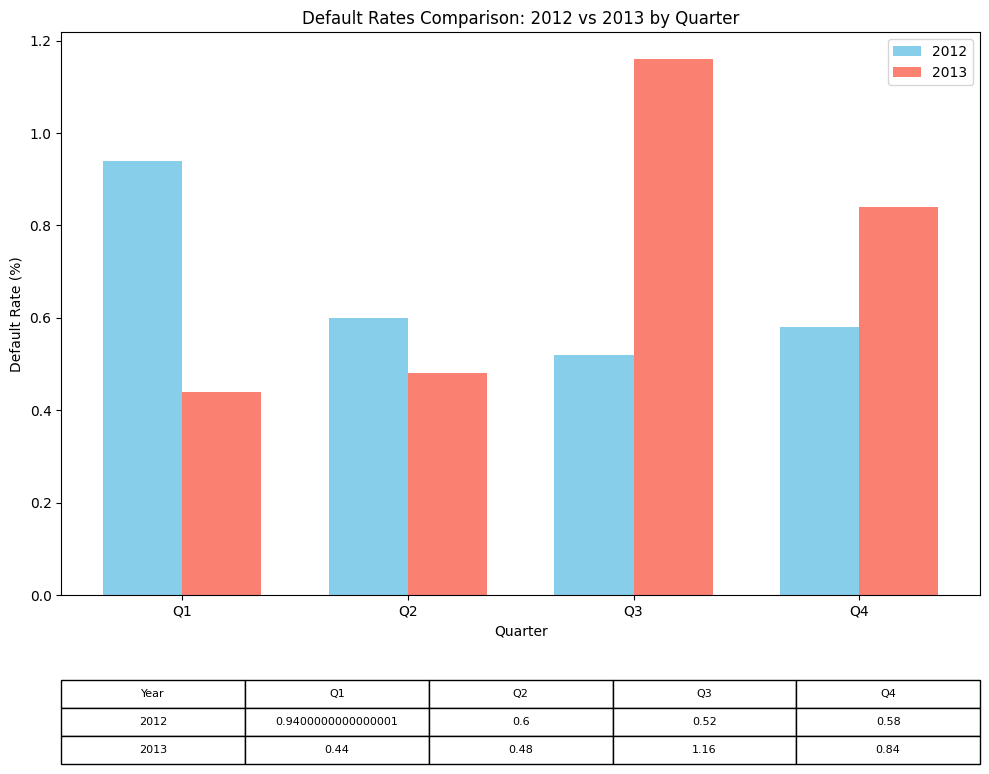

In [ ]:
#Q6
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt

# List of quarters corresponding to the file names
quarters_2012 = ['2012Q1', '2012Q2', '2012Q3', '2012Q4']
quarters_2013 = ['2013Q1', '2013Q2', '2013Q3', '2013Q4']

# Initialize lists to store the default rates for 2012 and 2013
default_rates_2012 = []
default_rates_2013 = []

# Function to calculate the default rate based on the Delinquency column
def calculate_default_rate(df):
    # Define loan statuses using the Delinquency column
    df = df.withColumn("Loan Status",
                       when(col("Delinquency") == '00', "Performing")
                       .when(col("Delinquency").isin(['01', '02', '03', '04']), "Delinquent")
                       .otherwise("Defaulted"))

    # Total loan count for the quarter
    total_loans = df.count()

    # Count of defaulted loans
    defaulted_loans = df.filter(col("Loan Status") == "Defaulted").count()

    # Calculate default rate as a percentage
    if total_loans > 0:
        default_rate = (defaulted_loans / total_loans) * 100
    else:
        default_rate = 0

    return default_rate

# Loop through 2012 and 2013 files, calculate the default rates
for file_name_2012, file_name_2013 in zip(quarters_2012, quarters_2013):
    print(f"Processing {file_name_2012} and {file_name_2013}...")

    # Load only the Delinquency column for 2012
    df_2012 = spark.read.parquet(cleaned_path + file_name_2012 + '.parquet').select("Delinquency")
    default_rate_2012 = calculate_default_rate(df_2012)
    default_rates_2012.append(default_rate_2012)

    # Load only the Delinquency column for 2013
    df_2013 = spark.read.parquet(cleaned_path + file_name_2013 + '.parquet').select("Delinquency")
    default_rate_2013 = calculate_default_rate(df_2013)
    default_rates_2013.append(default_rate_2013)

# Create indices for quarters
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
index = list(range(len(quarters)))  # Indices for the quarters

# Plotting the results side by side
bar_width = 0.35  # Width of the bars

plt.figure(figsize=(10, 8))

# Bars for 2012
plt.bar(index, default_rates_2012, bar_width, label='2012', color='skyblue')

# Bars for 2013, placed next to the 2012 bars
plt.bar([i + bar_width for i in index], default_rates_2013, bar_width, label='2013', color='salmon')

# Labeling
plt.xlabel('Quarter')
plt.ylabel('Default Rate (%)')
plt.title('Default Rates Comparison: 2012 vs 2013 by Quarter')
plt.xticks([i + bar_width / 2 for i in index], quarters)  # Center the labels between the bars
plt.legend()

# Add a table displaying the default rates
table_data = [['2012', *default_rates_2012], ['2013', *default_rates_2013]]
columns = ['Year', 'Q1', 'Q2', 'Q3', 'Q4']

# Add the table below the plot
plt.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='bottom', bbox=[0.0, -0.3, 1.0, 0.15])

# Adjust the layout to make space for the table
plt.tight_layout()

# Display the plot and the table
plt.show()

**Key Observations:**

#### 1. Q1 Default Rates
- **2012**: The default rate in Q1 of 2012 was **0.94%**, which is the highest quarterly default rate for the year.
- **2013**: The default rate in Q1 of 2013 was **0.44%**, showing a significant reduction compared to 2012.
  
- **Analysis**: The sharp decline in default rates from 2012 to 2013 in Q1 suggests that loans originated in 2013 during this quarter had lower risk factors, potentially due to more stringent lending practices or improved economic conditions.

#### 2. Q2 Default Rates
- **2012**: The default rate in Q2 of 2012 was **0.60%**.
- **2013**: The default rate in Q2 of 2013 was slightly lower at **0.48%**.

- **Analysis**: The default rate for Q2 remained relatively stable across both years, with a slight improvement in 2013. This indicates that loan performance in this quarter was consistent, but with minor improvements in default risk.

#### 3. Q3 Default Rates
- **2012**: The default rate in Q3 of 2012 was **0.52%**.
- **2013**: The default rate in Q3 of 2013 spiked significantly to **1.16%**, the highest default rate across all quarters for both years.

- **Analysis**: The sharp rise in default rates during Q3 of 2013 compared to 2012 suggests that loans originated during this period in 2013 experienced increased risk. This could be due to external economic factors, changes in borrower profiles, or differences in loan origination practices during this quarter.

#### 4. Q4 Default Rates
- **2012**: The default rate in Q4 of 2012 was **0.58%**.
- **2013**: The default rate in Q4 of 2013 was **0.84%**, higher than in 2012.

- **Analysis**: The increase in default rates in Q4 of 2013 compared to 2012 shows that loans originated during this quarter in 2013 faced more risk. However, the increase is not as dramatic as in Q3, indicating a more moderate but still notable rise in default risk for this period.

**Overall Analysis:**
- The **default rates in 2013** showed a mixed pattern compared to 2012. While Q1 and Q2 of 2013 saw a noticeable reduction in default rates, Q3 and Q4 experienced increases, with Q3 2013 exhibiting a **1.16%** default rate, which is the highest among all quarters.
  
- The **spike in Q3 2013** is particularly concerning and suggests that there may have been specific factors influencing loan performance for loans originated in this period. This could be due to changes in lending conditions, borrower demographics, or external economic pressures.

- The comparison suggests that **default risk is not uniform across quarters** and that external factors or internal lending decisions could have influenced performance significantly from quarter to quarter. Further investigation into macroeconomic conditions or lending practices during these quarters could provide deeper insights.

This analysis helps to highlight the variability in default rates across different quarters and years, which could be useful for lenders in adjusting their risk models and lending strategies.

### 3.7 Recovery Rate for Defaulted Loans

In [ ]:
#Q7
from pyspark.sql.functions import col, when, avg

# Assuming df_all is already loaded

# Select only the necessary columns from df_all
df_selected = df_all.select(
    "Delinquency",          # For determining loan status
    "Current Actual UPB",    # For calculating recovery rate
    "Original UPB"           # For calculating recovery rate
)

# Define loan status based on the Delinquency column
df_selected = df_selected.withColumn("Loan Status",
                                     when(col("Delinquency").isin(['00']), "Performing")
                                     .when(col("Delinquency").isin(['01', '02', '03', '04']), "Delinquent")
                                     .otherwise("Defaulted"))

# Filter for Defaulted loans
df_defaulted = df_selected.filter(col("Loan Status") == "Defaulted")

# Calculate recovery rate where Current Actual UPB is 0, assuming loan has been resolved
df_recovery = df_defaulted.withColumn("Recovery Rate (%)",
                                      (col("Current Actual UPB") / col("Original UPB")) * 100)

# Calculate the average recovery rate
average_recovery_rate = df_recovery.agg(avg(col("Recovery Rate (%)")).alias("avg_recovery_rate")).collect()[0]["avg_recovery_rate"]

print(f"Average Recovery Rate for Defaulted Loans: {average_recovery_rate:.2f}%")


Average Recovery Rate for Defaulted Loans: 10.98%


**Analysis**:
- A recovery rate of **10.98%** indicates that, on average, only a small fraction of the loan balance is recovered after a loan defaults. This suggests that a large portion of the loan principal is lost during the recovery process, whether through foreclosure or alternative methods such as loan sales or modifications.
  
- **Implications for Lenders**:
  - The low recovery rate suggests that defaulted loans represent a significant financial loss for lenders. This low recovery could be attributed to a combination of factors, including declining property values, high foreclosure costs, and borrower insolvency.
  - Lenders may need to reconsider their strategies for handling delinquent loans and defaults, focusing on **early intervention** (e.g., loan modifications or repayment plans) to minimize losses. Additionally, risk mitigation strategies such as insurance or more conservative lending practices might be warranted for high-risk borrowers.

- **Market Conditions**:
  - The recovery rate may also reflect broader market conditions during the period in question. For example, in regions where property values have declined or where foreclosure processes are particularly costly and time-consuming, recovery rates tend to be lower.
  
- **Borrower Behavior**:
  - Borrower insolvency and the inability to recover full loan amounts through asset liquidation (such as selling the property) can also contribute to the low recovery rates.

**Conclusion**:
- With a recovery rate of **10.98%**, lenders experience substantial losses when loans default, recovering only a small portion of the loan balance. This insight emphasizes the need for **proactive management of delinquent loans** and exploring alternative methods to resolve defaults before they result in significant financial loss.

### 3.8 Property Price Trends: Average, Median, and Variance Over Time


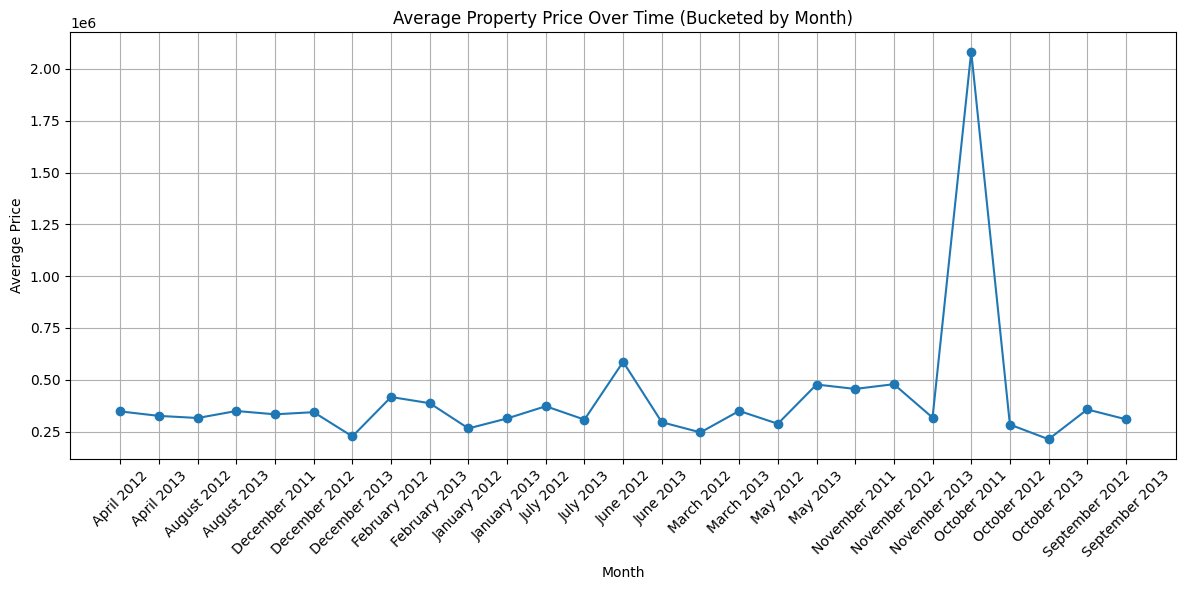

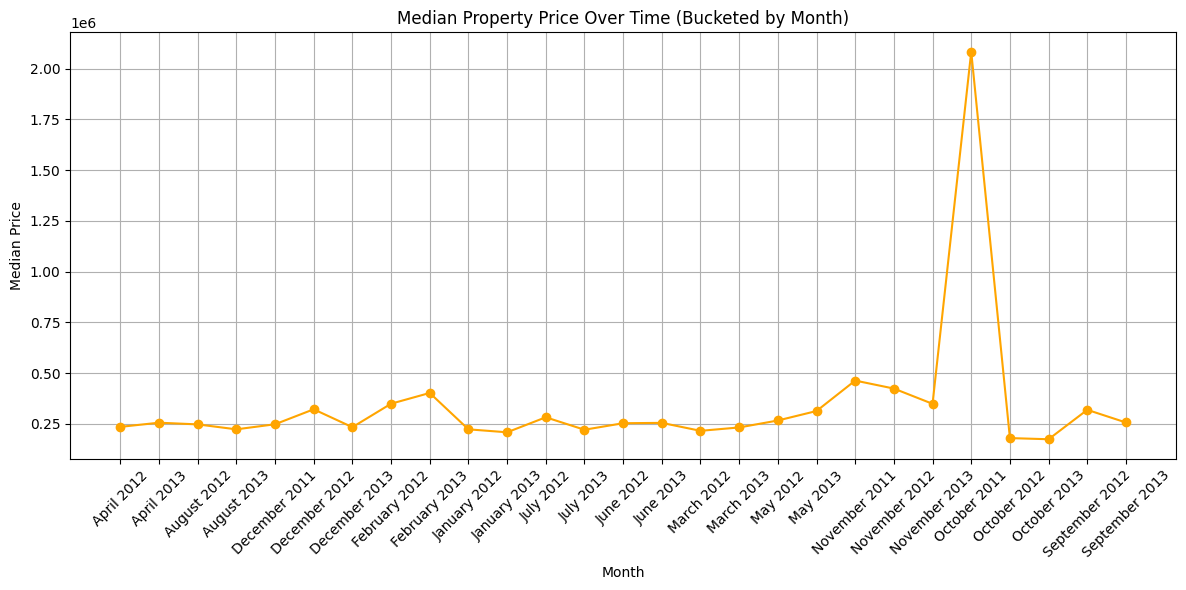

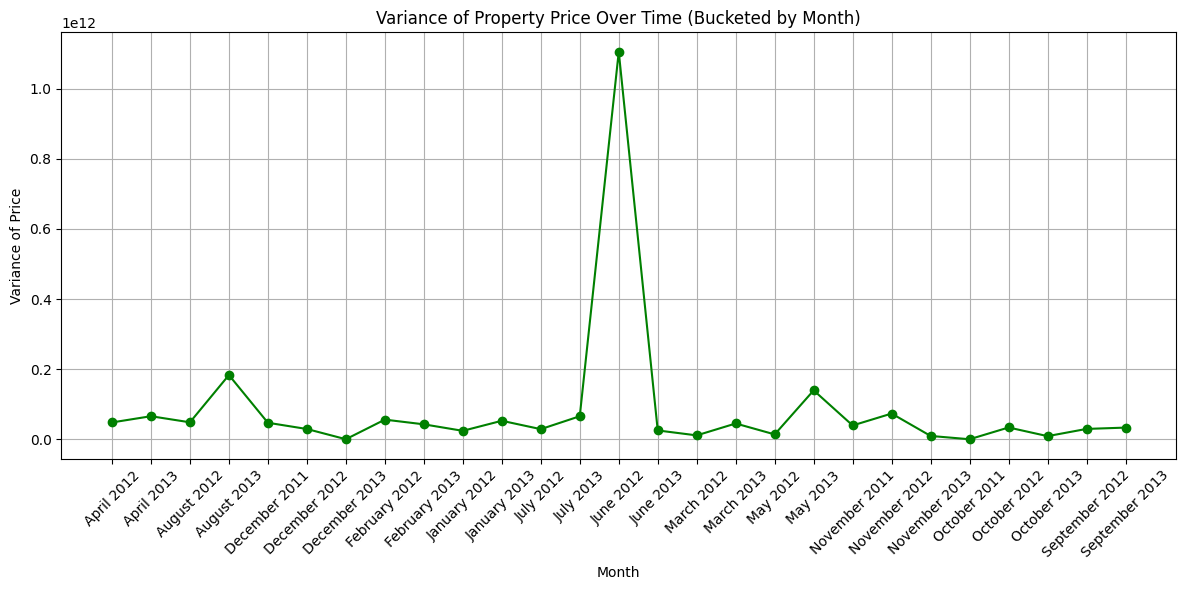

In [ ]:
#Q8
from pyspark.sql.functions import col, avg, variance, expr
import matplotlib.pyplot as plt

# Assuming df_all is already loaded

# Select only the required columns from df_all
df_selected = df_all.select(
    "Original UPB",
    "Original Loan to Value Ratio (LTV)",
    "Origination Date"
)

# Calculate property price using 'Original Loan to Value Ratio (LTV)' and 'Original UPB'
df_selected = df_selected.withColumn('Property_Price',
                                     (col('Original UPB') / (col('Original Loan to Value Ratio (LTV)') / 100)))

# Aggregate the required statistics
agg_df = df_selected.groupBy('Origination Date').agg(
    avg('Property_Price').alias('Average_Price'),
    expr('percentile_approx(Property_Price, 0.5)').alias('Median_Price'),
    variance('Property_Price').alias('Variance_Price')
).orderBy('Origination Date')

# Collect the aggregated data as lists for plotting
agg_data = agg_df.collect()  # Collect all the data in one step to reduce multiple calls

monthly_periods = [row['Origination Date'] for row in agg_data]
average_prices = [row['Average_Price'] for row in agg_data]
median_prices = [row['Median_Price'] for row in agg_data]
variance_prices = [row['Variance_Price'] for row in agg_data]

# Plot 1: Average Property Price
plt.figure(figsize=(12, 6))
plt.plot(monthly_periods, average_prices, label='Average Price', marker='o')
plt.xticks(rotation=45)
plt.title('Average Property Price Over Time (Bucketed by Month)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Median Property Price
plt.figure(figsize=(12, 6))
plt.plot(monthly_periods, median_prices, label='Median Price', marker='o', color='orange')
plt.xticks(rotation=45)
plt.title('Median Property Price Over Time (Bucketed by Month)')
plt.xlabel('Month')
plt.ylabel('Median Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Variance of Property Price
plt.figure(figsize=(12, 6))
plt.plot(monthly_periods, variance_prices, label='Variance of Price', marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Variance of Property Price Over Time (Bucketed by Month)')
plt.xlabel('Month')
plt.ylabel('Variance of Price')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1. Average Property Price Over Time

- The **average property price** remained relatively stable for most of the period, hovering around **$250,000 to $500,000**.
- A notable **spike in property prices** occurs in **October 2013**, where the average property price sharply increases to over **$2 million**.
  - This sharp spike could be an outlier or the result of a few high-value transactions that occurred in this specific month, skewing the average significantly.
- After this spike, the prices returned to the usual range.
  
**Analysis**: The spike in October 2013 indicates either a rare market event or high-value property sales that inflated the average significantly for that month. Excluding this anomaly, the average property price appears fairly consistent over time.

#### 2. Median Property Price Over Time

- The **median property price** follows a pattern similar to the average property price, remaining mostly stable throughout the period with minor fluctuations.
- Like the average price, a large **spike in median price** is observed in **October 2013**, reaching above **$2 million**.
  - This suggests that a majority of the properties sold during this period were high-value homes.
- The property prices stabilize back to their normal levels shortly after the spike, with the median generally staying around **$250,000**.

**Analysis**: The median property price confirms the same trend as the average price, showing that the market experienced a sudden surge in high-value sales during October 2013. However, since the median price is less affected by extreme values than the average, it reflects the central tendency of the data more robustly.

#### 3. Variance of Property Price Over Time

- The **variance of property prices** remained quite low for most of the period, indicating a relatively stable market with prices clustering around the mean.
- A massive **variance spike** in **October 2013** corresponds with the spikes in both the average and median property prices.
  - This spike in variance suggests a significant divergence in property prices during this period, with properties being sold at widely varying price points, potentially due to a mix of very high-end and lower-value properties.
  
**Analysis**: The large variance spike highlights that the market during October 2013 was highly volatile, with significant differences in property values. Outside of this month, the variance is low, indicating that property prices were generally stable and homogenous during the rest of the analyzed period.

### Overall Analysis:
- **Price Stability**: Throughout the analyzed period, property prices remained fairly stable, with both average and median values indicating consistency within the market.
- **October 2013 Spike**: The anomaly in October 2013, where both average, median, and variance values spike dramatically, suggests a unique market event or a series of high-value property sales. This event led to a temporary surge in the prices and increased volatility, which subsided soon after.
- **Long-Term Trends**: Aside from the anomaly, property prices maintained consistent patterns, reflecting a stable housing market with minor monthly fluctuations.

This analysis provides valuable insights into the property market's stability over the given period, with the exception of the outlier event in October 2013. Lenders, investors, and market analysts can use these trends to understand market behavior and make informed decisions.

## 4. Conclusion

In this project, we conducted an in-depth analysis of the Fannie Mae Single-Family Loan Performance dataset, focusing on key aspects of loan performance, borrower characteristics, and property price trends. By leveraging various statistical and visualization techniques, we explored the relationships between credit scores, loan-to-value (LTV) ratios, interest rates, and loan statuses. Our key findings include:

1. **Creditworthiness and Loan Performance**:
   - A comparison of FICO scores between 2012 and 2013 showed minor fluctuations, with a slight decline in creditworthiness. However, the correlation between FICO scores and loan performance was weak, indicating that FICO scores alone are not definitive predictors of loan defaults.

2. **Delinquency and Loan Terms**:
   - Delinquency rates varied significantly by loan term, with shorter-term loans (120 months) showing higher delinquency rates across 30, 60, and 90+ day past due categories. The 360-month loans also exhibited significant short-term delinquencies, though most were resolved before becoming severely delinquent.

3. **Default Analysis**:
   - Our analysis revealed that defaulted loans were distributed across a range of FICO scores, LTV ratios, and interest rates, with notable clusters around higher LTV ratios and mid-range interest rates. This indicates that a combination of factors, rather than any single variable, drives the risk of default.

4. **Default Rate Trends**:
   - The quarterly comparison of default rates between 2012 and 2013 revealed significant variability, particularly in Q3 2013, where default rates spiked. This suggests that external market conditions or lending practices during that period may have contributed to the increased risk.

5. **Loan Recovery**:
   - The average recovery rate for defaulted loans was only 10.98%, indicating substantial financial losses for lenders when defaults occur. This underscores the importance of risk mitigation strategies and proactive borrower assistance.

6. **Property Price Trends**:
   - Property prices remained relatively stable over the analyzed period, with both average and median prices showing consistency. However, an outlier event in October 2013 caused a sharp spike in property prices and variance, suggesting a unique market event or series of high-value transactions.

### Recommendations:
- Lenders should consider adopting more nuanced risk models that account for multiple factors, including LTV ratios, interest rates, and borrower profiles, rather than relying solely on FICO scores.
- The variability in default rates across different quarters emphasizes the need for dynamic risk management strategies that adapt to changing market conditions.
- Given the low recovery rate for defaulted loans, early intervention measures, such as loan modifications or repayment assistance, could help minimize losses.

In conclusion, this project provided valuable insights into loan performance and market trends within the U.S. housing sector. These findings can inform more effective lending practices, risk management strategies, and market predictions moving forward.
